# Image Scrapbook

[https://github.com/image-rs/image](https://github.com/image-rs/image)

[![crates.io](https://img.shields.io/crates/v/image.svg)](https://crates.io/crates/image)

## Notebook setup

In [2]:
:dep evcxr_content = { path = "evcxr_content" }
:dep image

use evcxr_content::EvcxrContent;

# Image generation

## Simple image generation

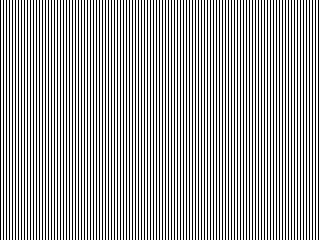

In [3]:
let mut img = image::ImageBuffer::from_fn(320, 240, |x, y| {
    image::Luma([if x % 3 == 0 { 0u8 } else { 255 }])
});
EvcxrContent::from_imagebuffer(&img)

## Generating an image from data structures

In [4]:
let track = [
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,96,186,186,78,60,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,95,184,184,77,59,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,167,0,0,203,167,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,167,0,0,203,182,221,221,168,0,0,0,0,
    0,0,0,0,0,114,96,186,186,186,186,186,186,186,186,307,186,76,58,0,0,203,167,0,0,240,0,0,0,0,
    0,0,0,0,0,113,95,184,184,184,184,184,184,184,184,271,184,75,57,0,0,203,167,0,0,240,0,0,0,0,
    0,0,0,0,0,203,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,167,0,0,240,0,0,0,0,
    0,0,0,0,0,203,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,167,0,0,240,0,0,0,0,
    0,0,0,0,0,203,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,167,0,0,240,0,0,0,0,
    0,0,0,0,0,203,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,182,221,221,166,0,0,0,0,
    0,0,0,0,0,203,167,0,0,0,197,179,72,72,72,72,161,143,0,0,0,203,167,0,0,0,0,0,0,0,
    0,0,0,0,0,203,167,0,197,179,196,178,70,70,70,70,160,142,161,143,0,203,167,0,0,0,0,0,0,0,
    0,0,0,0,0,112,94,186,196,178,195,177,0,0,0,0,159,141,160,142,186,76,58,0,0,0,0,0,0,0,
    0,0,0,0,0,111,93,184,195,177,0,0,0,0,0,0,0,0,159,141,184,75,57,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
].iter().map(|&x| if x == 0 { 0 } else { 255 }).collect::<Vec<u8>>();
let img = image::GrayImage::from_vec(30, 16, track).unwrap();
EvcxrContent::from_imagebuffer(&img)

# Image processing

## Resize without smoothing

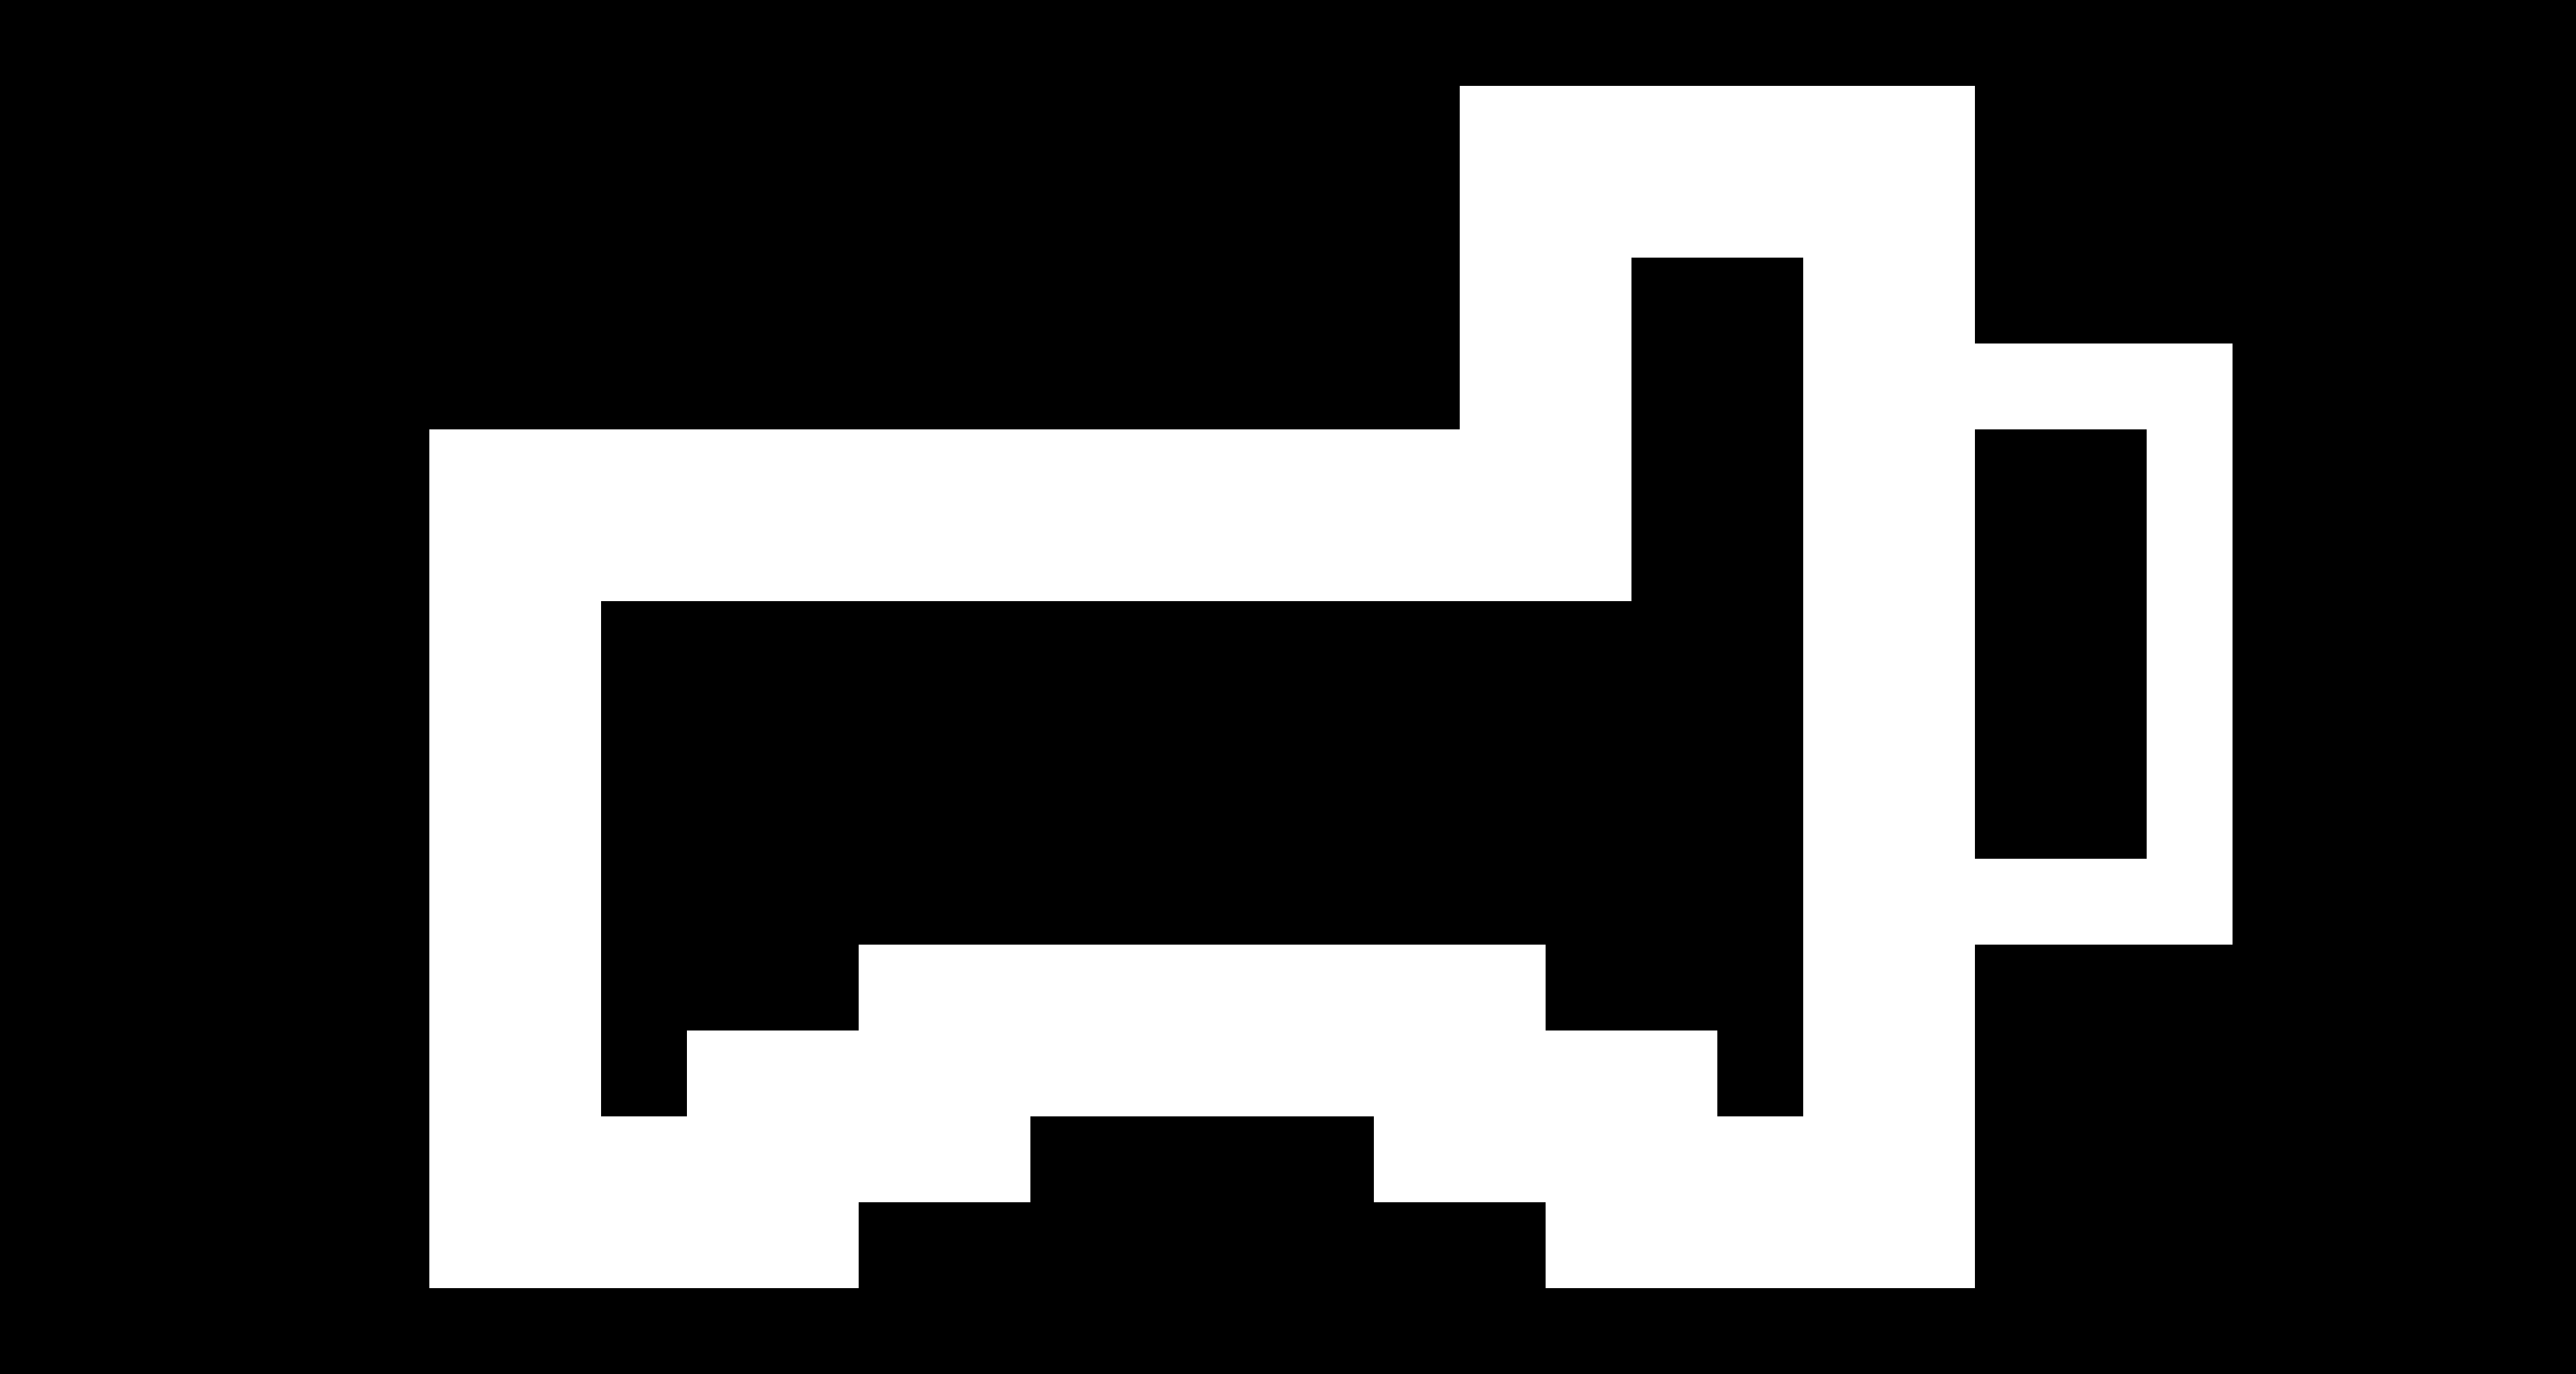

In [5]:
let map = image::imageops::resize(&img, 30*128, 16*128, image::imageops::FilterType::Nearest);
EvcxrContent::from_imagebuffer(&map)

## Resize and post-filtering

This is a "reference" guassian blur... but it is also very slow.

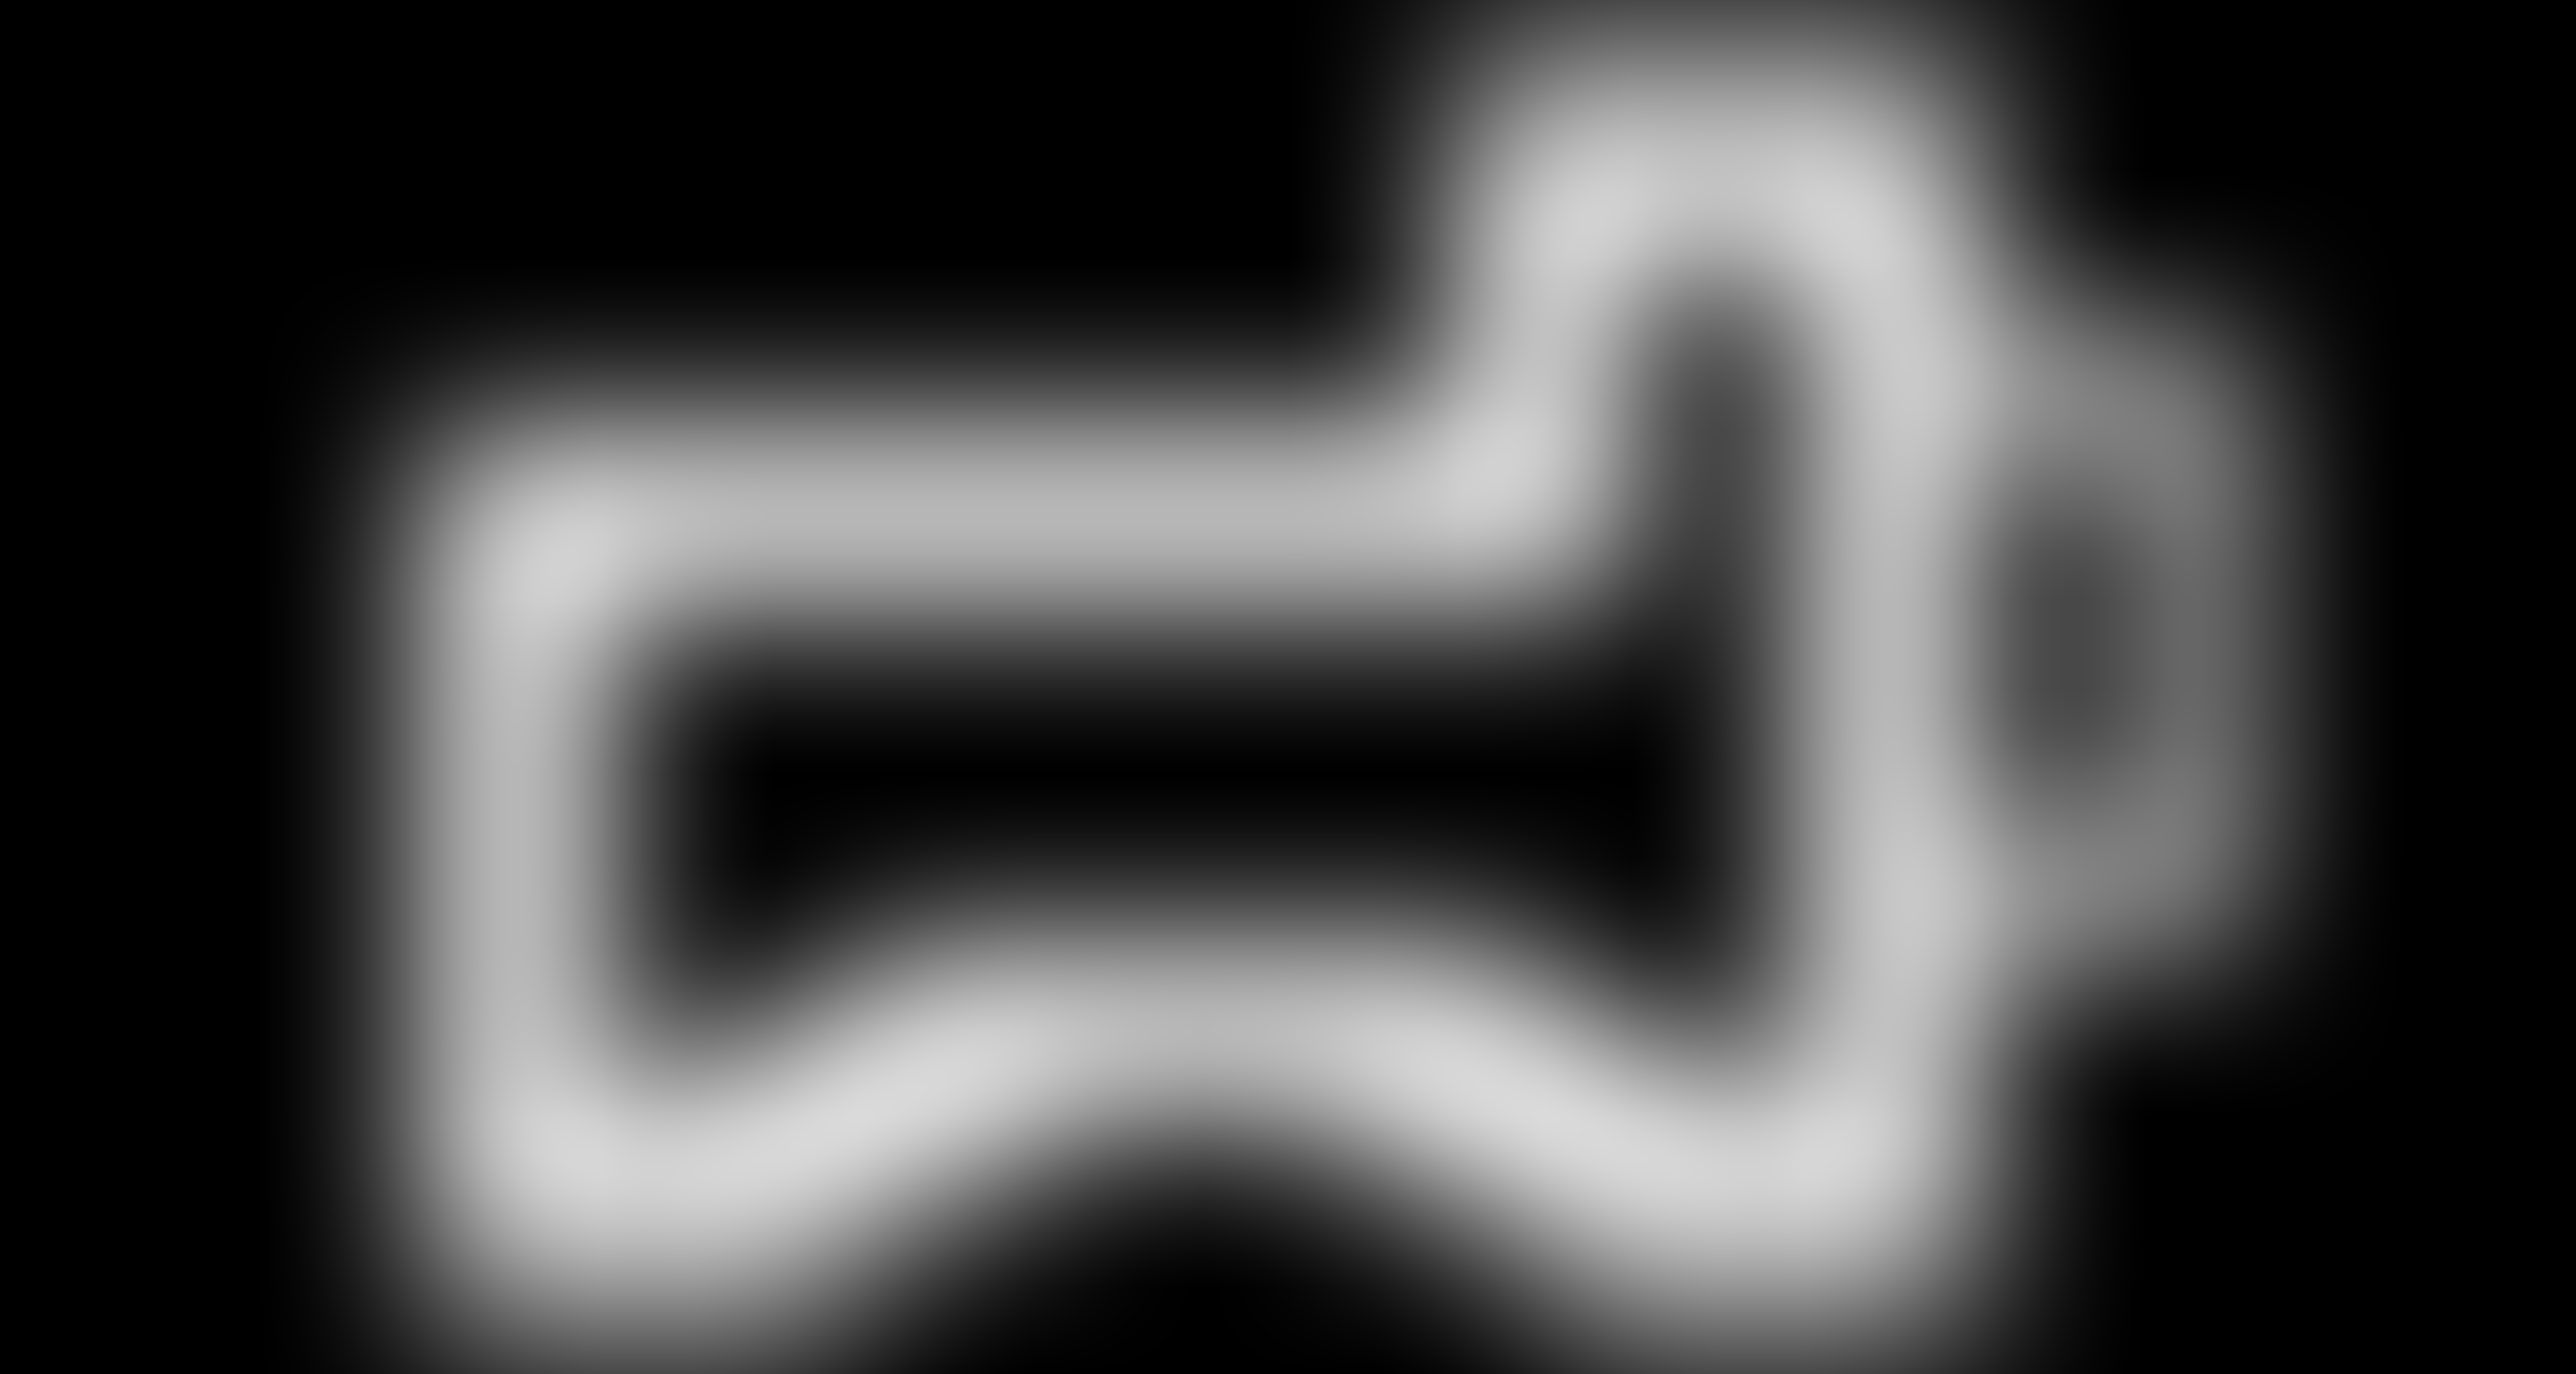

In [6]:
let map = image::imageops::resize(&img, 30*128, 16*128, image::imageops::FilterType::Nearest);
let field = image::imageops::blur(&map, 128.0);
EvcxrContent::from_imagebuffer(&field)

## Resize with built-in guassian blur

Compare this image with the "true" guassian blur above.

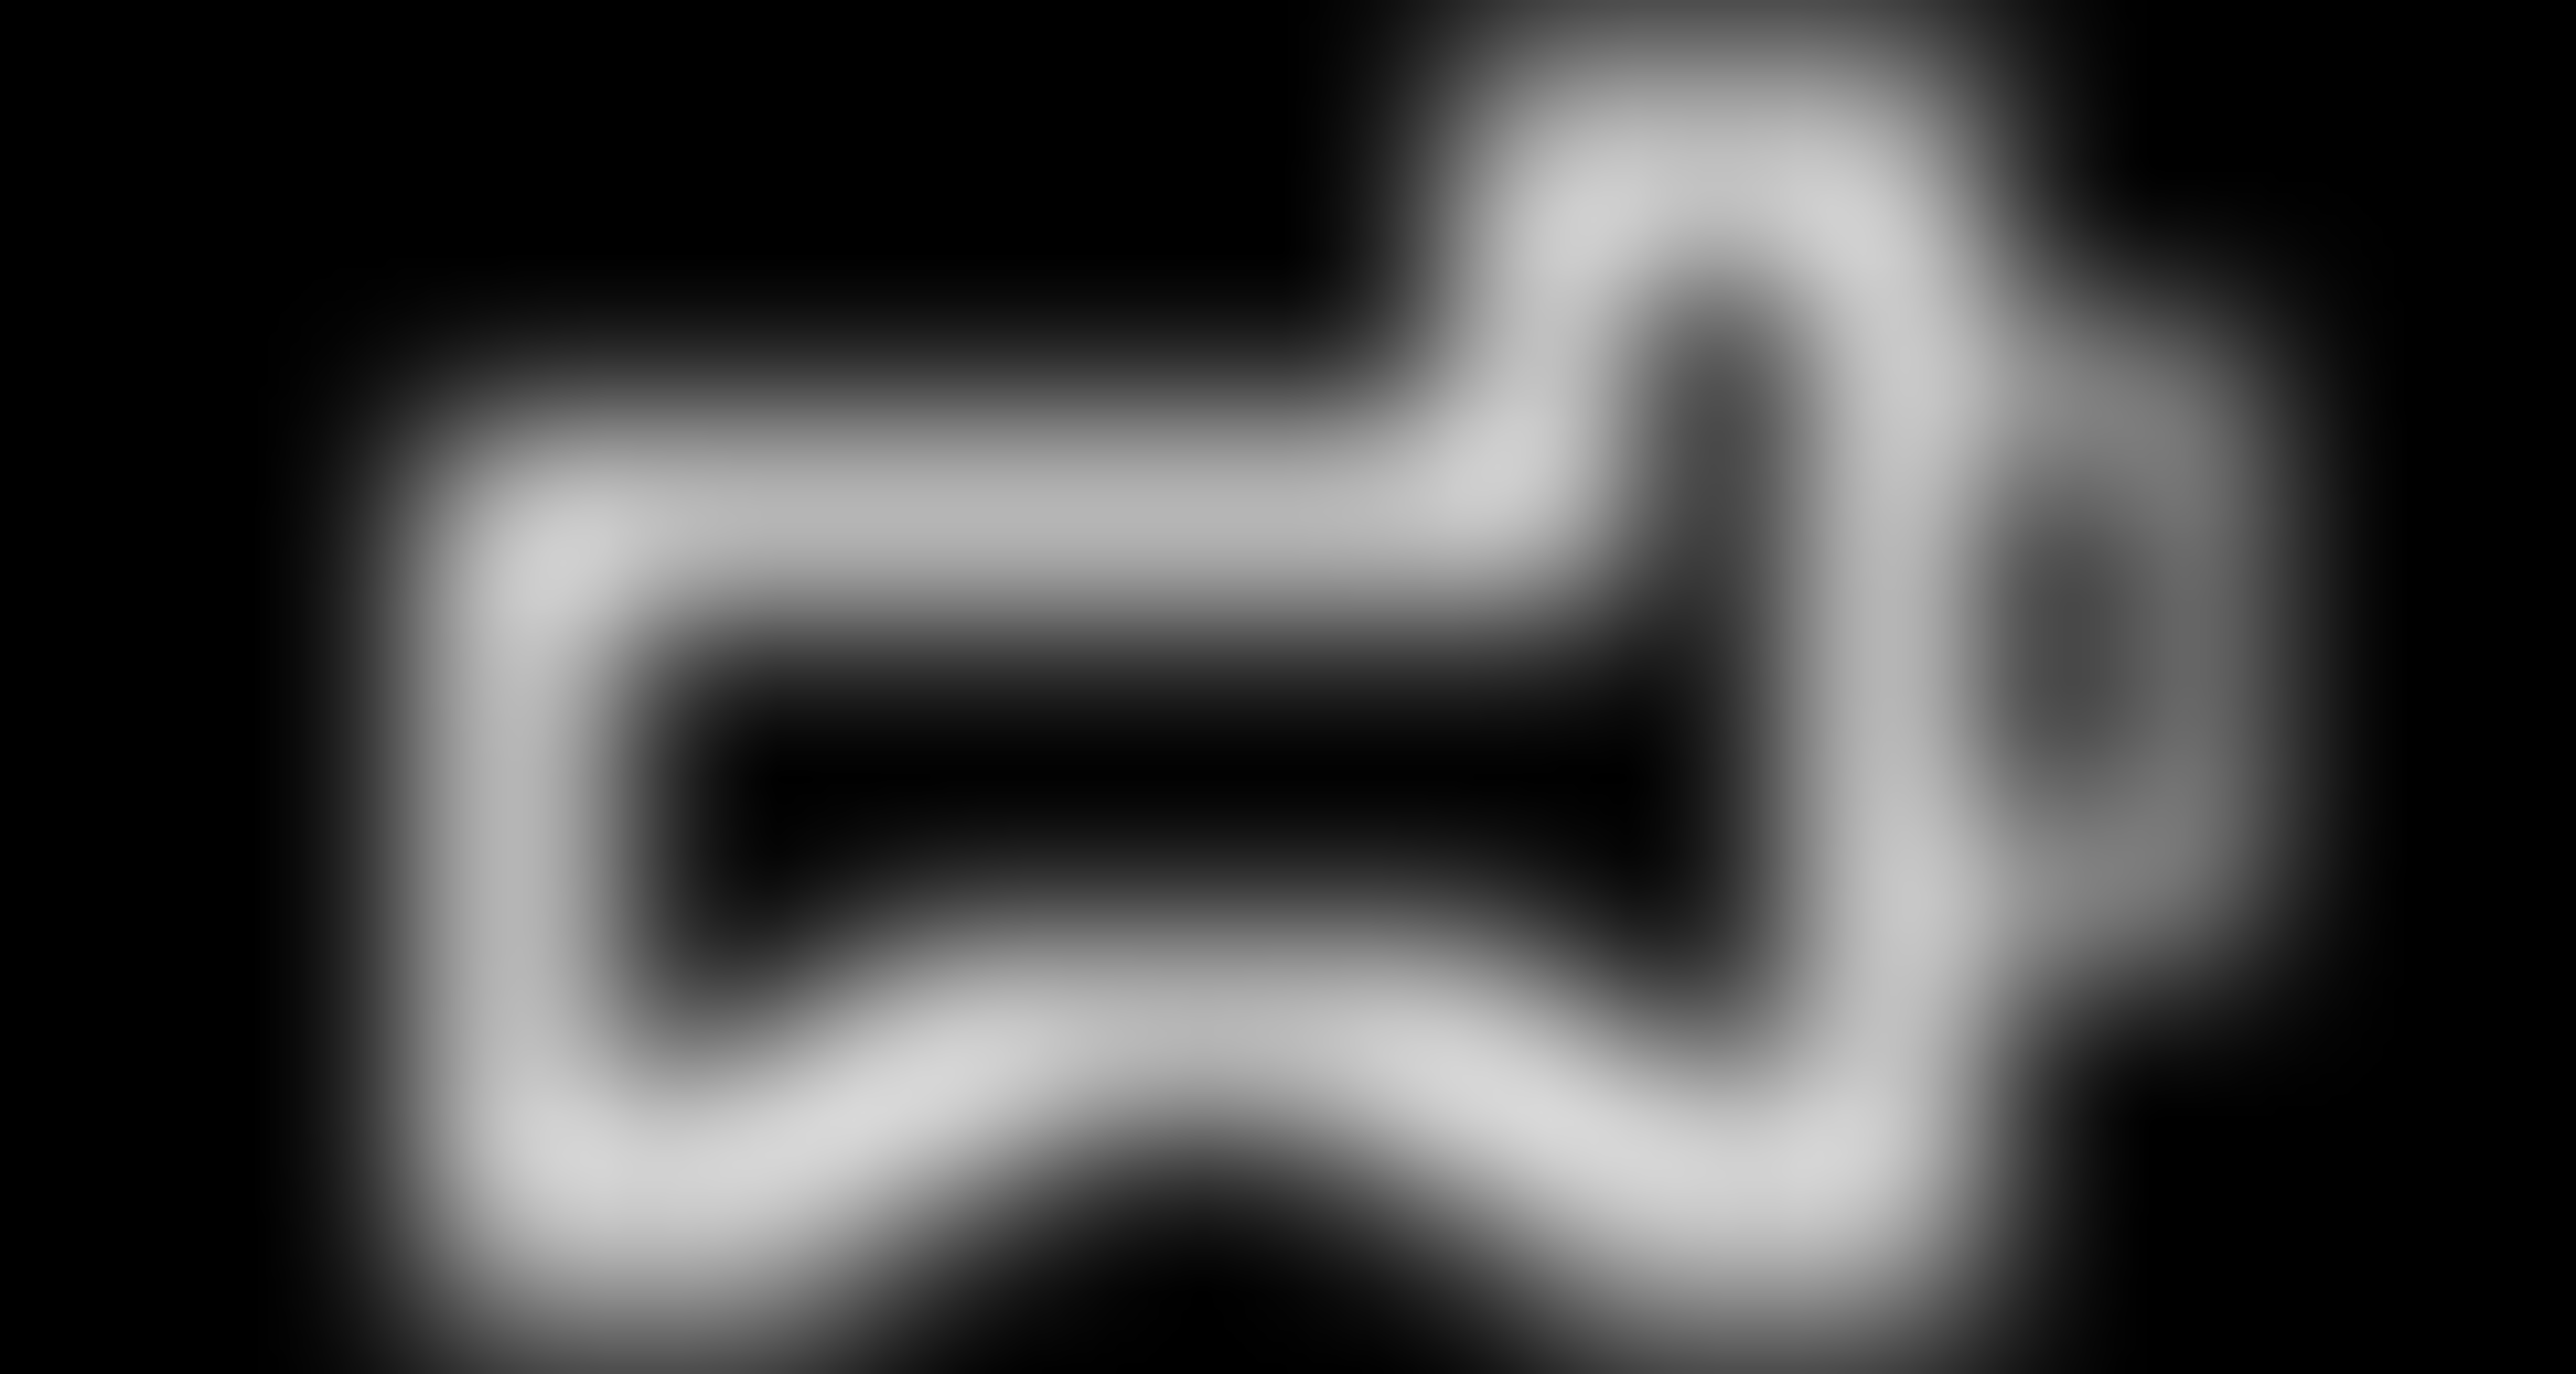

In [11]:
let map = image::imageops::resize(&img, 30*128, 16*128, image::imageops::FilterType::Gaussian);
EvcxrContent::from_imagebuffer(&field)